In [1]:
using DataArrays, DataFrames, Gadfly

## Medición del punto de operación

Se utilizó un arreglo de centelladoras, llamado arreglo de coincidencias, con el cual se desea medir el punto de operación del sistema, y el rango de operación del mismo. 

In [51]:
# Medición del punto de operación del sistema

df = DataFrame()
df[:Voltaje] = [550, 570, 590, 610, 630, 650, 670, 690, 710, 
730, 750, 770, 790, 810, 830, 850]
df[:Medicion1] = [4,7,12,62,60,110,0,0,0,0,0,0,0,0,0,0]
df[:Medicion2] = [5,18,18,26,93,89,0,0,0,0,0,0,0,0,0,0]
df[:Medicion3] = [3,21,37,30,72,85,0,0,0,0,0,0,0,0,0,0]
df[:Medicion4] = [11,3,13,29,59,104,0,0,0,0,0,0,0,0,0,0]
df[:Medicion5] = [3,10,20,32,57,98,0,0,0,0,0,0,0,0,0,0]
df[:Promedio] = [(df[:Medicion1][1]+df[:Medicion2][1]+df[:Medicion3][1]+df[:Medicion4][1]+df[:Medicion5][1])/5,
    (df[:Medicion1][2]+df[:Medicion2][2]+df[:Medicion3][2]+df[:Medicion4][2]+df[:Medicion5][2])/5,
    (df[:Medicion1][3]+df[:Medicion2][3]+df[:Medicion3][3]+df[:Medicion4][3]+df[:Medicion5][3])/5,
    (df[:Medicion1][4]+df[:Medicion2][4]+df[:Medicion3][4]+df[:Medicion4][4]+df[:Medicion5][4])/5,
    (df[:Medicion1][5]+df[:Medicion2][5]+df[:Medicion3][5]+df[:Medicion4][5]+df[:Medicion5][5])/5,
    (df[:Medicion1][6]+df[:Medicion2][6]+df[:Medicion3][6]+df[:Medicion4][6]+df[:Medicion5][6])/5,
    (df[:Medicion1][7]+df[:Medicion2][7]+df[:Medicion3][7]+df[:Medicion4][7]+df[:Medicion5][7])/5,
    (df[:Medicion1][8]+df[:Medicion2][8]+df[:Medicion3][8]+df[:Medicion4][8]+df[:Medicion5][8])/5,
    (df[:Medicion1][9]+df[:Medicion2][9]+df[:Medicion3][9]+df[:Medicion4][9]+df[:Medicion5][9])/5,
    (df[:Medicion1][10]+df[:Medicion2][10]+df[:Medicion3][10]+df[:Medicion4][10]+df[:Medicion5][10])/5,
    (df[:Medicion1][11]+df[:Medicion2][11]+df[:Medicion3][11]+df[:Medicion4][11]+df[:Medicion5][11])/5,
    (df[:Medicion1][12]+df[:Medicion2][12]+df[:Medicion3][12]+df[:Medicion4][12]+df[:Medicion5][12])/5,
    (df[:Medicion1][13]+df[:Medicion2][13]+df[:Medicion3][13]+df[:Medicion4][13]+df[:Medicion5][13])/5,
    (df[:Medicion1][14]+df[:Medicion2][14]+df[:Medicion3][14]+df[:Medicion4][14]+df[:Medicion5][14])/5,
    (df[:Medicion1][15]+df[:Medicion2][15]+df[:Medicion3][15]+df[:Medicion4][15]+df[:Medicion5][15])/5,
    (df[:Medicion1][16]+df[:Medicion2][16]+df[:Medicion3][16]+df[:Medicion4][16]+df[:Medicion5][16])/5]
df

,Voltaje,Medicion1,Medicion2,Medicion3,Medicion4,Medicion5,Promedio
1,550,4,5,3,11,3,5.2
2,570,7,18,21,3,10,11.8
3,590,12,18,37,13,20,20.0
4,610,62,26,30,29,32,35.8
5,630,60,93,72,59,57,68.2
6,650,110,89,85,104,98,97.2
7,670,0,0,0,0,0,0.0
8,690,0,0,0,0,0,0.0
9,710,0,0,0,0,0,0.0
10,730,0,0,0,0,0,0.0


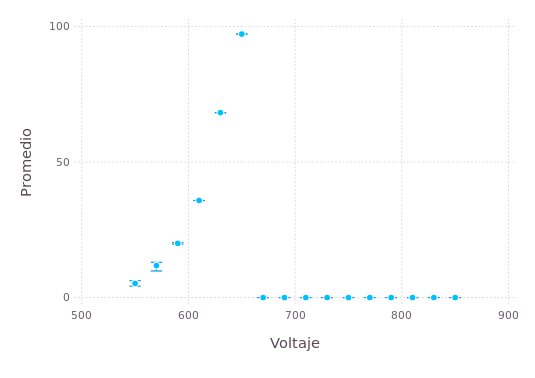

In [50]:
# Plot
#Gadfly
#plot(df, layer(x="Voltaje", y="Medicion1", Geom.point),layer(x="Voltaje", y="Medicion2", Geom.point))
lower =  [1,2,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0]
upper =  [1,1.2,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0]

ymins = df[:Promedio] .- lower
ymaxs = df[:Promedio] .+ upper

plot(df,x="Voltaje",y="Promedio", ymin=ymins, ymax=ymaxs, Geom.point, Geom.errorbar)